In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivo Excel
file_path = 'primaryironproduction.xlsx'

# Lista de hojas (nombres de países)
sheet_names = ['Argentina', 'Brasil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Cargar el archivo
xls = pd.ExcelFile(file_path)

### Descripción de los Datos

In [3]:
# Función para analizar una hoja
def analizar_hoja(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Mostrar dimensiones
    #print(f"{sheet}: {df.shape}")
    print(f"🔍 Dimensión del dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

    # Análisis por columnas
    resumen = []
    #for col in df.columns:
    #     tipo_dato = df[col].dtype
    #     tipo = 'Numérico' if pd.api.types.is_numeric_dtype(df[col]) else 'Categórico'
    #     n_valores_unicos = df[col].nunique()
    #     valores_unicos = df[col].unique() if n_valores_unicos <= 10 else f"{n_valores_unicos} únicos"
    #     nulos = df[col].isnull().sum()

    #     resumen.append({
    #         "Nombre": col,
    #         "Tipo de dato": tipo_dato,
    #         "Tipo (Cat/Num)": tipo,
    #         "Valores únicos": valores_unicos,
    #         "Valores nulos": nulos
    #     })
    resumen = pd.DataFrame({
        'Tipo de dato': df.dtypes,
       #'Valores únicos': df.nunique(),
        'Valores no nulos': df.count(),
        'Valores nulos': df.isnull().sum()
    })
    resumen['Tipo (Cat/Num)'] = resumen['Tipo de dato'].apply(
        lambda x: 'Numérico' if pd.api.types.is_numeric_dtype(x) else 'Categórico'
    )

    resumen_df = pd.DataFrame(resumen)
    print("\n📌 Resumen de variables:")
    print(resumen_df)
    print("\n" + "="*50)

In [4]:
# Ejecutar análisis por cada hoja
for sheet in sheet_names:
    analizar_hoja(sheet)


📄 Hoja: Argentina
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categórico
Mid_Value          float64               167              1       Numérico
Mid_Change         float64               167              1       Numérico


📄 Hoja: Brasil
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168              0     Categórico
Mid_Value          float64               167              1       Numérico
Mid_Change         float64               167              1       Numérico


📄 Hoja: Chile
🔍 Dimensión del dataset: 168 filas, 3 columnas

📌 Resumen de variables:
              Tipo de dato  Valores no nulos  Valores nulos Tipo (Cat/Num)
Date        datetime64[ns]               168             

### Exploración de los Datos

In [5]:
# Función para realizar la exploración de datos
def exploracion_de_datos(sheet_name):
    print(f"\n📄 Hoja: {sheet_name}")
    df = pd.read_excel(xls, sheet_name=sheet_name, header=5)

    # Dividir las columnas en cualitativas y cuantitativas
    cuantitativas = df.select_dtypes(include=['float64', 'int64'])
    temporales = df.select_dtypes(include=['datetime64[ns]'])

    # Análisis para variables cualitativas
    print("\n Distribución de frecuencias para variables cualitativas:")

    # Medidas estadísticas para variables cuantitativas
    print("\n Medidas estadísticas para variables cuantitativas:")

    if not temporales.empty:
        for col in temporales.columns:
            print(f"\nAnálisis de la variable: {col}")
            print(f"- Media temporal (fecha): {temporales[col].mean()}")
            print(f"- Rango de fechas: {temporales[col].min()} - {temporales[col].max()}")

    if not cuantitativas.empty:
        for col in cuantitativas.columns:
            print(f"\nAnálisis de la variable: {col}")

            # Descripción estadística con describe()
            desc = cuantitativas[col].describe()
            print(desc)

            # Cuartiles y Rango Intercuartílico (IQR)
            Q1 = desc['25%']
            Q3 = desc['75%']
            IQR = Q3 - Q1
            print(f"- Rango intercuartílico (IQR): {IQR}")

            # Outliers
            outliers = cuantitativas[(cuantitativas[col] < (Q1 - 1.5 * IQR)) | (cuantitativas[col] > (Q3 + 1.5 * IQR))]
            print(f"- Outliers detectados: {outliers.shape[0]}")

            #Series de tiempo
            plt.figure(figsize=(10, 4))
            plt.plot(df[temporales.columns[0]], df[col], marker='o')
            plt.title(f"Serie de tiempo de {col}")
            plt.xlabel("Fecha")
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(True)
            plt.show()

            # Boxplot
            print("\n")
            plt.figure(figsize=(6, 4))
            sns.boxplot(x=cuantitativas[col])
            plt.title(f"Boxplot de {col}")
            plt.show()

            # Histograma para distribución de datos
            plt.figure(figsize=(6, 4))
            sns.histplot(cuantitativas[col], kde=True, bins=20)
            plt.title(f"Histograma de {col}")
            plt.show()

    # Análisis de correlación (Mapa de calor)
    print("\n Análisis de correlación de las variables cuantitativas:")
    if not cuantitativas.empty and cuantitativas.shape[1] > 1:
        corr_matrix = cuantitativas.corr()
        plt.figure(figsize=(4, 3))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title("Mapa de calor de la correlación entre variables cuantitativas")
        plt.show()

    print("\n" + "="*40)


📄 Hoja: Argentina

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    167.000000
mean     295.203437
std       65.555752
min       92.368000
25%      252.023500
50%      300.810000
75%      335.094500
max      418.442000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 83.07099999999997
- Outliers detectados: 3


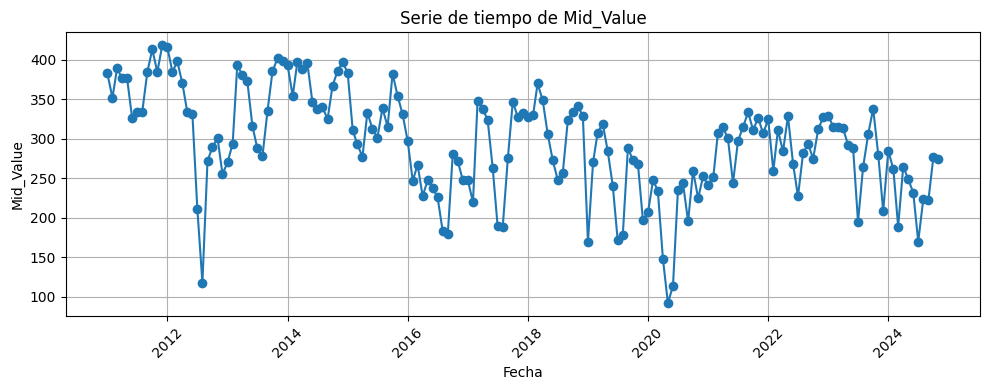

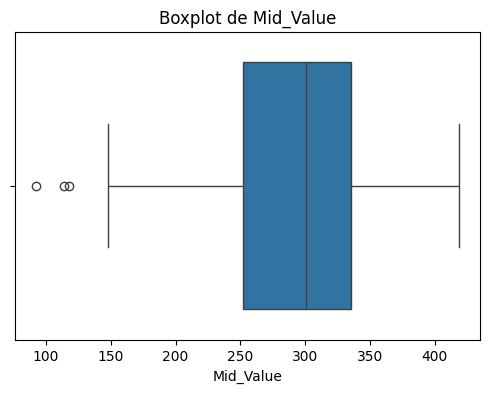

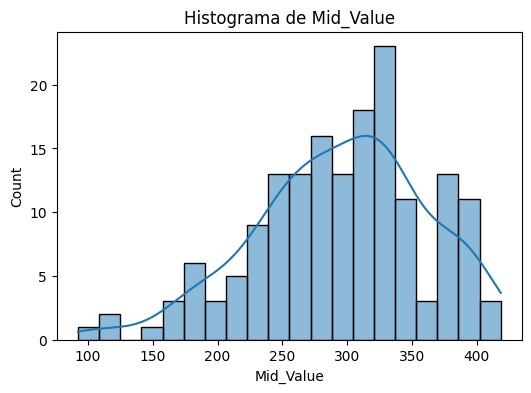


Análisis de la variable: Mid_Change
count    167.000000
mean       1.854719
std       22.136387
min      -48.355710
25%       -7.854571
50%       -1.319737
75%        7.998865
max      130.494868
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 15.853436097955546
- Outliers detectados: 18


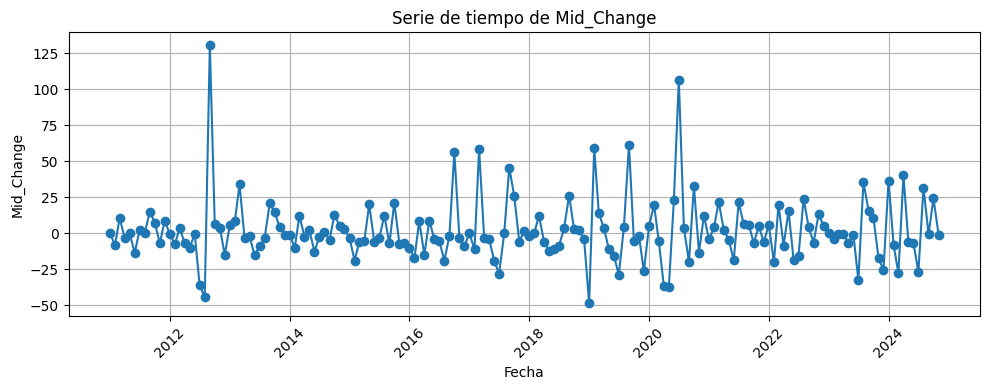

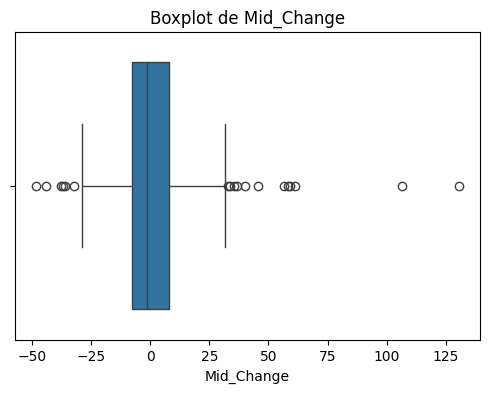

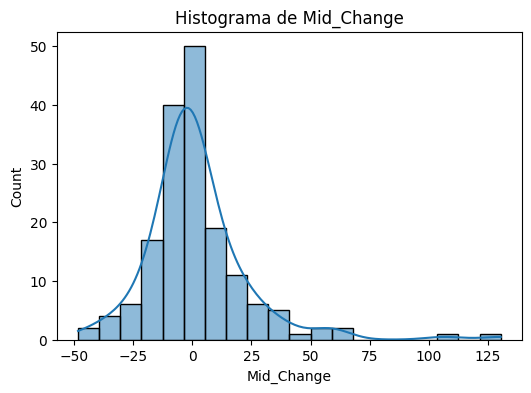


 Análisis de correlación de las variables cuantitativas:


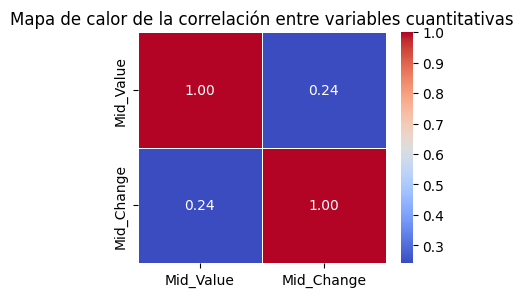



📄 Hoja: Brasil

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count     167.000000
mean     2247.583832
std       160.972798
min      1678.065000
25%      2159.695500
50%      2240.000000
75%      2358.000000
max      2575.000000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 198.3045000000002
- Outliers detectados: 4


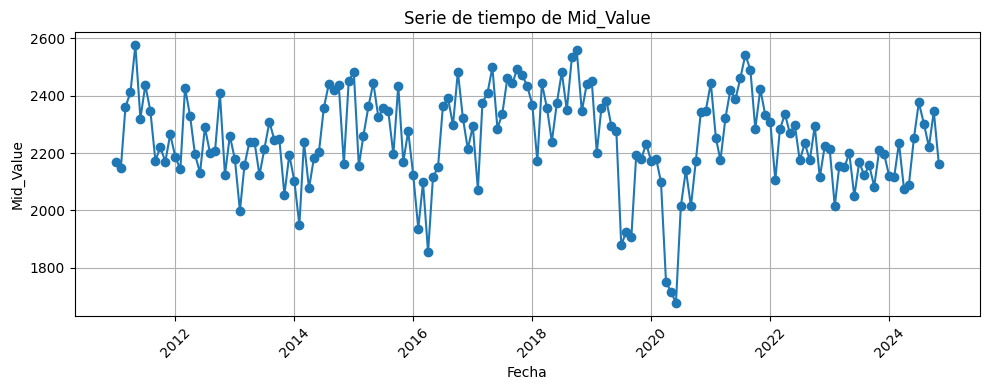

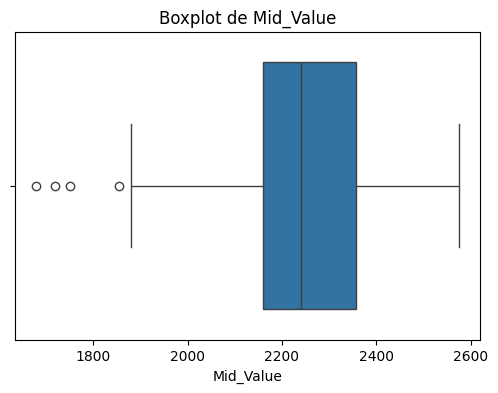

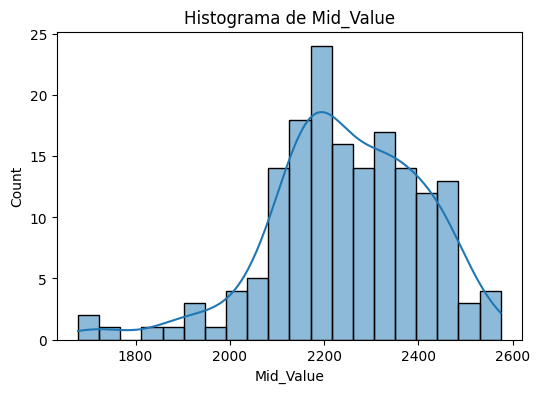


Análisis de la variable: Mid_Change
count    167.000000
mean       0.211522
std        6.550099
min      -17.460366
25%       -3.787689
50%        0.122052
75%        4.902769
max       20.079198
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 8.690458626234095
- Outliers detectados: 2


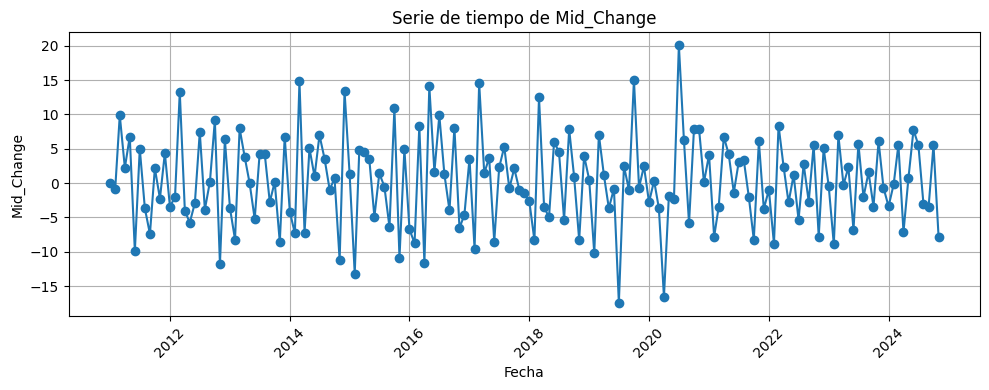

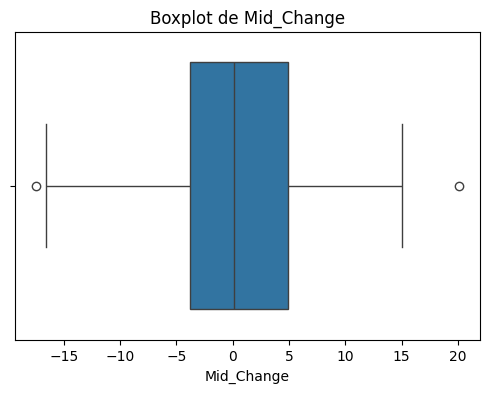

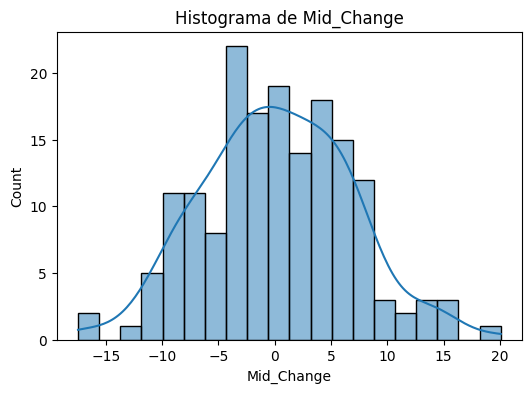


 Análisis de correlación de las variables cuantitativas:


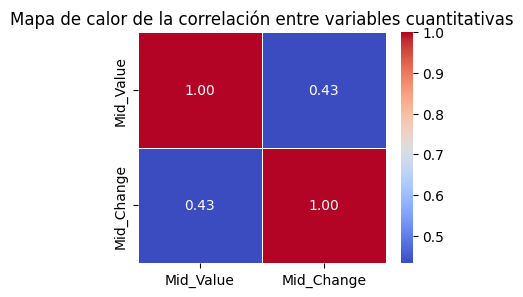



📄 Hoja: Chile

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count     167.000000
mean      201.009044
std       535.552763
min        10.011800
25%        51.571750
50%        56.604000
75%        62.854250
max      2375.872000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 11.282500000000013
- Outliers detectados: 39


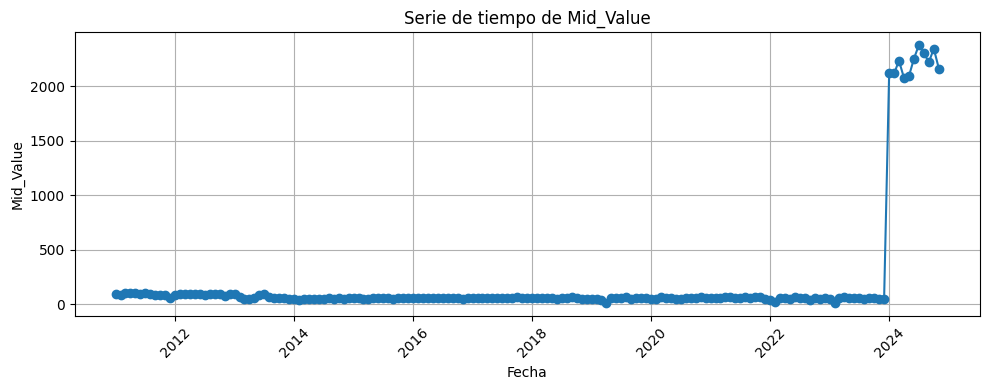

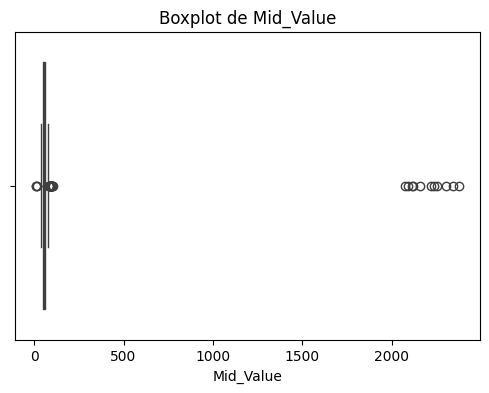

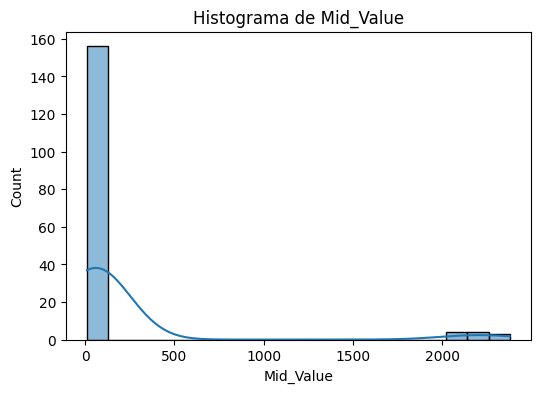


Análisis de la variable: Mid_Change
count     167.000000
mean       31.355581
std       342.675724
min       -74.700147
25%        -7.940194
50%        -0.265170
75%         5.624552
max      4382.072361
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 13.564746250737866
- Outliers detectados: 17


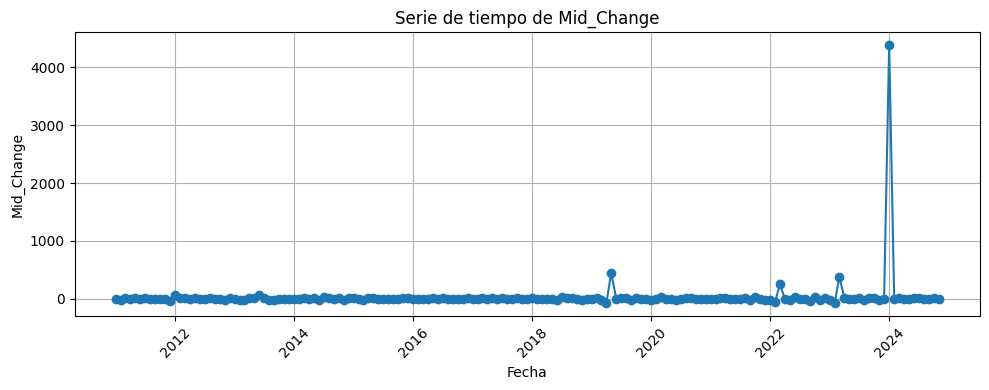

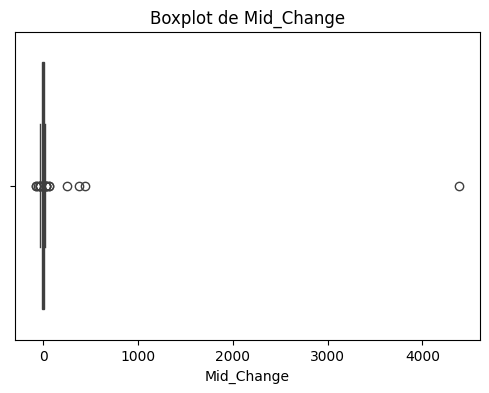

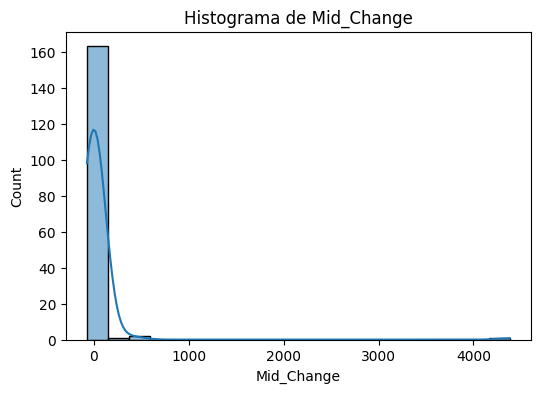


 Análisis de correlación de las variables cuantitativas:


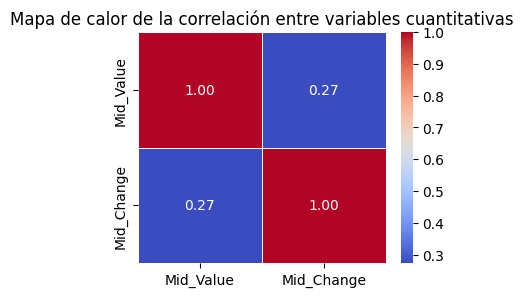



📄 Hoja: Colombia

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    167.000000
mean      19.646261
std        6.193156
min        1.392000
25%       15.472491
50%       18.361800
75%       23.907684
max       33.017680
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 8.43519312526014
- Outliers detectados: 3


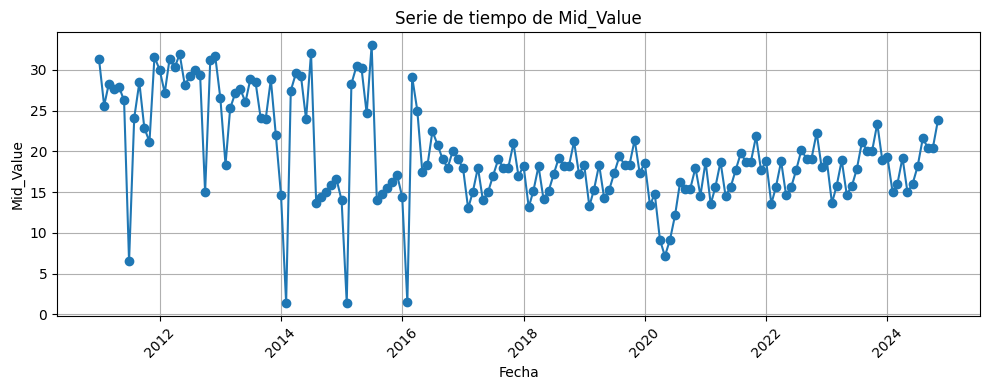

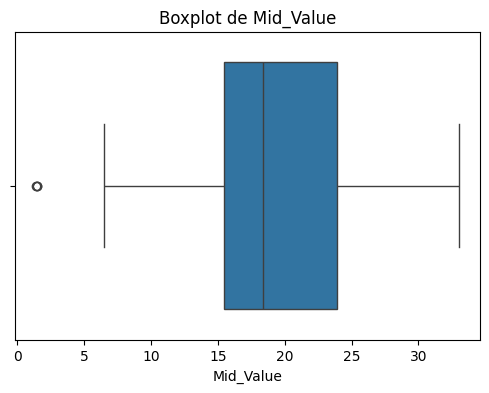

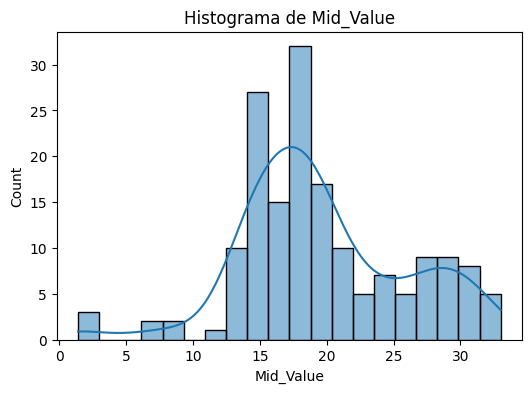


Análisis de la variable: Mid_Change
count     167.000000
mean       33.821591
std       251.302874
min       -90.527390
25%       -15.623944
50%         2.521037
75%        13.333333
max      1871.479885
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 28.957276907128605
- Outliers detectados: 9


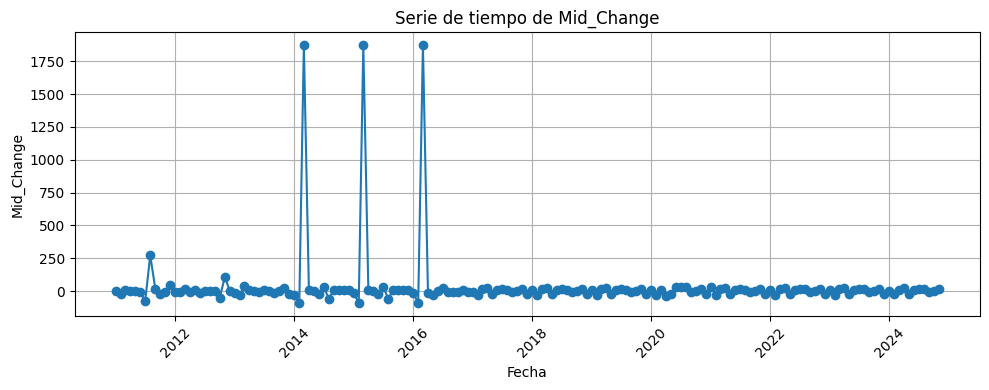

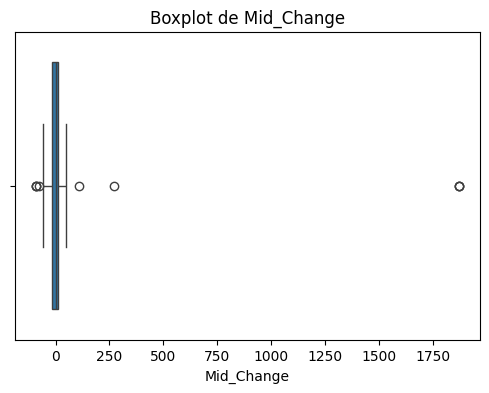

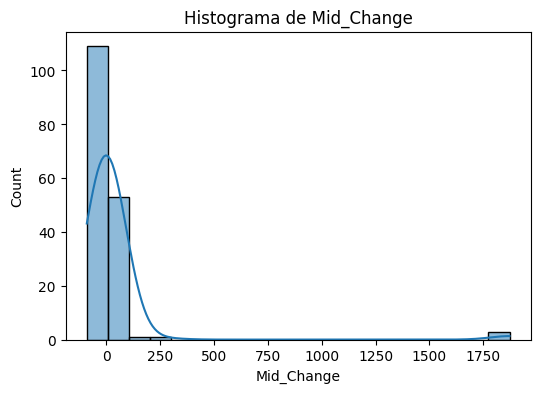


 Análisis de correlación de las variables cuantitativas:


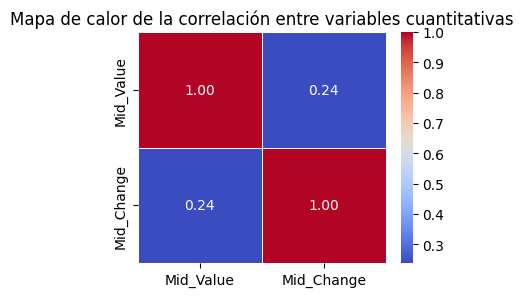



📄 Hoja: Mexico

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count     167.000000
mean      777.069150
std       150.611339
min       213.429000
25%       703.486333
50%       824.410000
75%       889.451500
max      1006.277000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 185.96516666667003
- Outliers detectados: 5


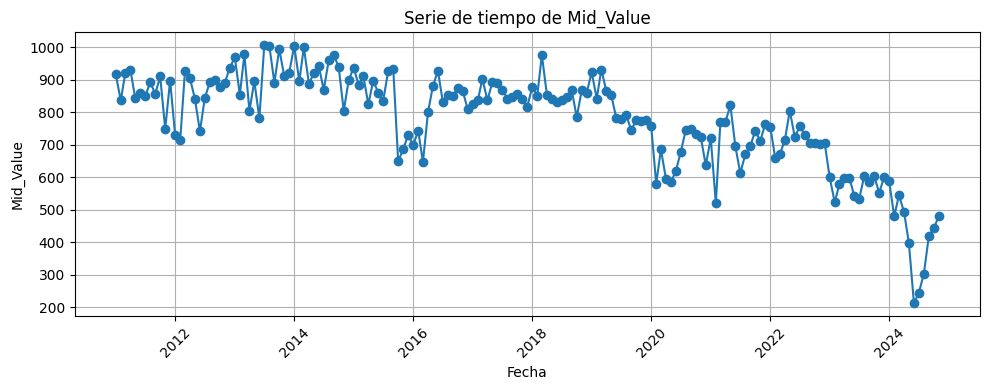

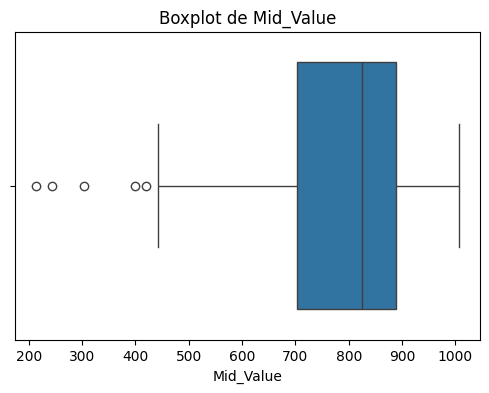

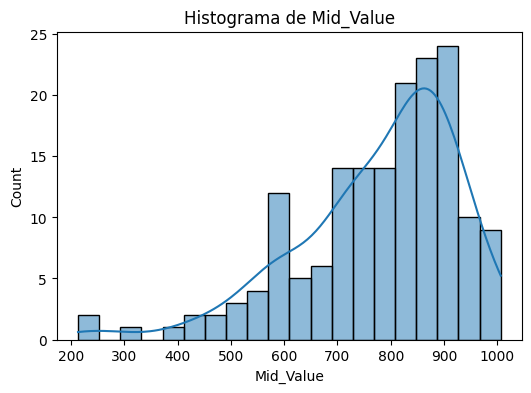


Análisis de la variable: Mid_Change
count    167.000000
mean       0.284706
std       11.481188
min      -46.474546
25%       -6.118080
50%        0.190700
75%        6.507251
max       47.951419
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 12.625330986100915
- Outliers detectados: 7


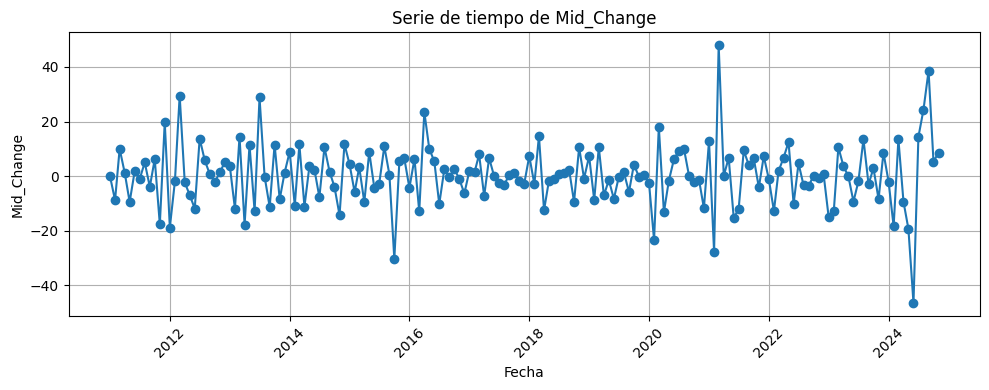

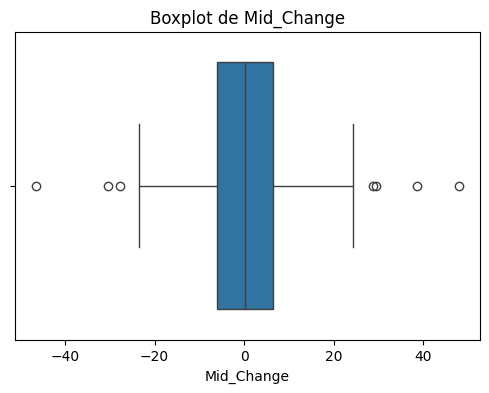

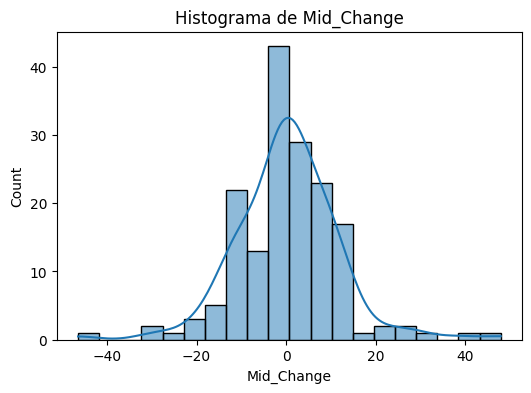


 Análisis de correlación de las variables cuantitativas:


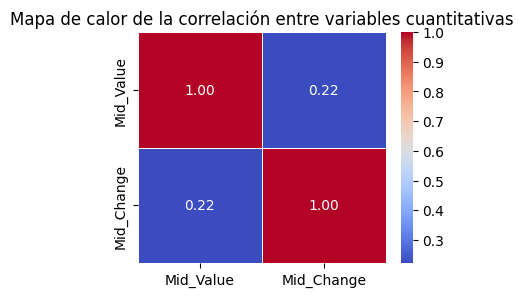



📄 Hoja: Peru

 Distribución de frecuencias para variables cualitativas:

 Medidas estadísticas para variables cuantitativas:

Análisis de la variable: Date
- Media temporal (fecha): 2017-12-15 22:51:25.714285824
- Rango de fechas: 2011-01-01 00:00:00 - 2024-12-01 00:00:00

Análisis de la variable: Mid_Value
count    64.000000
mean      7.137516
std       1.830272
min       0.783000
25%       6.372250
50%       7.907500
75%       8.429500
max       9.661000
Name: Mid_Value, dtype: float64
- Rango intercuartílico (IQR): 2.057249999999999
- Outliers detectados: 3


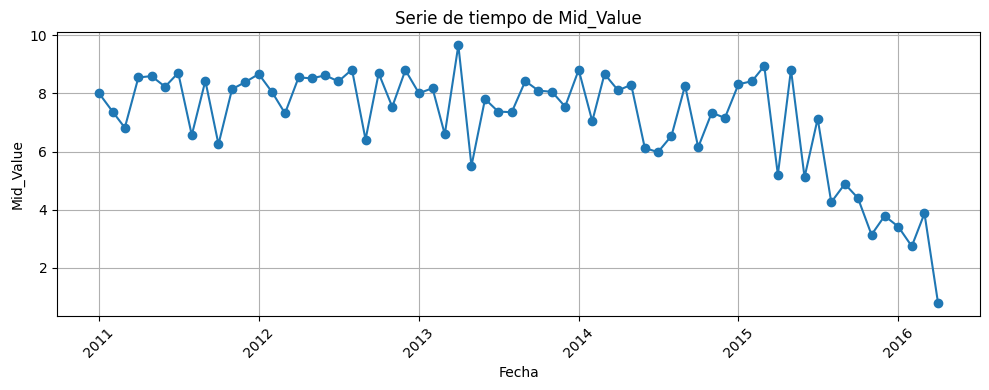

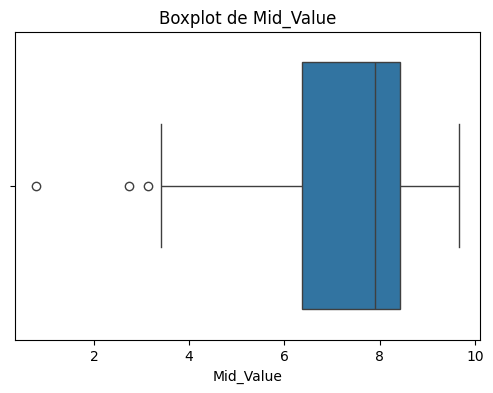

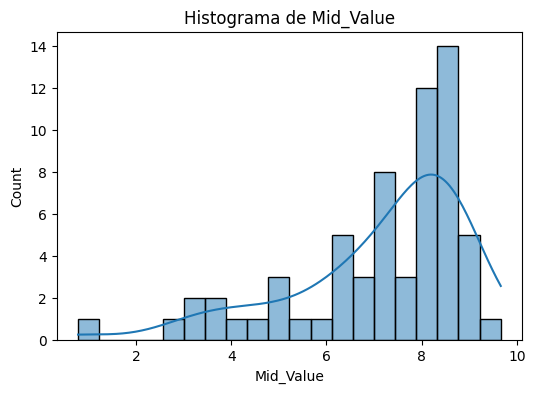


Análisis de la variable: Mid_Change
count    64.000000
mean      0.171372
std      24.903364
min     -79.767442
25%      -9.813575
50%      -0.318703
75%      16.347469
max      69.596154
Name: Mid_Change, dtype: float64
- Rango intercuartílico (IQR): 26.161043615043138
- Outliers detectados: 2


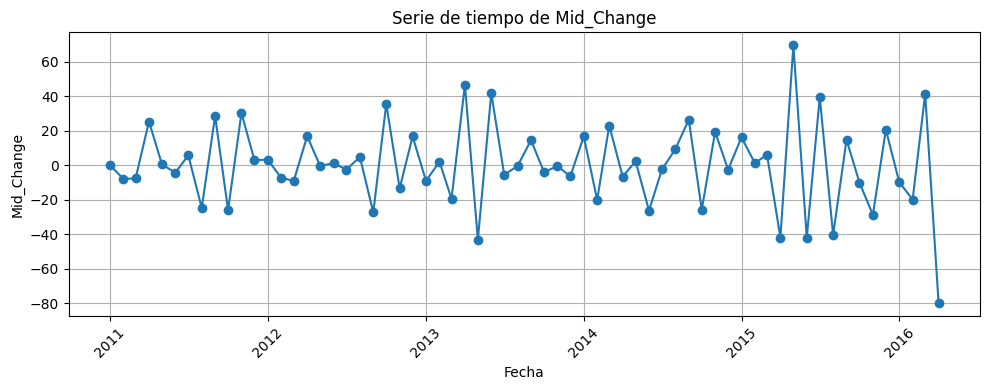

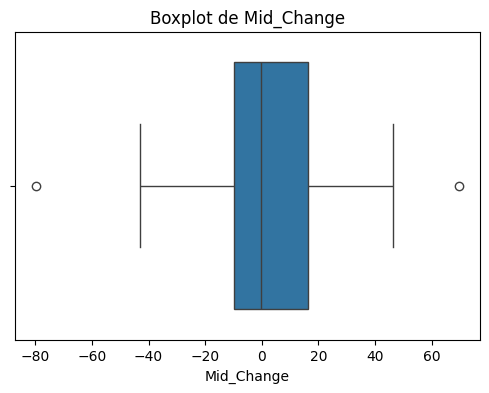

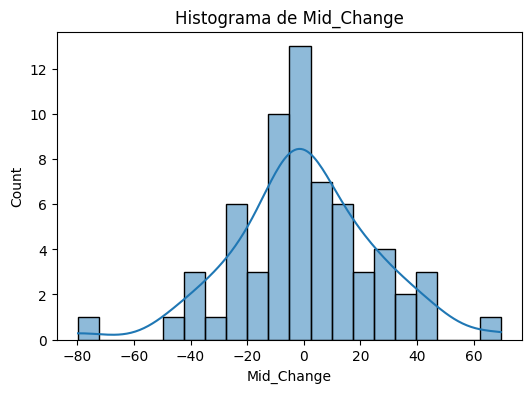


 Análisis de correlación de las variables cuantitativas:


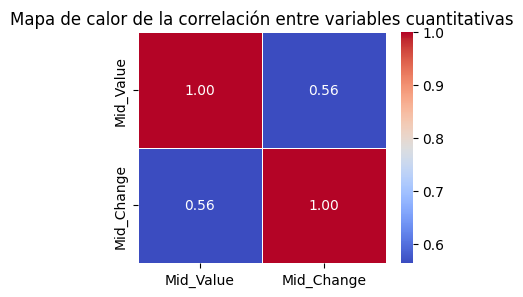

In [6]:
# Ejecutar el análisis para cada hoja
for sheet in sheet_names:
    exploracion_de_datos(sheet)